#**Load the Dataset as copy API command**

In [ ]:
!kaggle datasets download -d youssefaboelwafa/hotel-booking-cancellation-prediction

Dataset URL: https://www.kaggle.com/datasets/youssefaboelwafa/hotel-booking-cancellation-prediction
License(s): GNU Lesser General Public License 3.0
100% 470k/470k [00:00<00:00, 1.10MB/s]
100% 470k/470k [00:00<00:00, 1.10MB/s]


In [ ]:
!unzip -q /content/hotel-booking-cancellation-prediction.zip -d /content/

# **Import** **Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report ,accuracy_score,confusion_matrix
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE

# **Read the Data**

In [ ]:
df=pd.read_csv('/content/booking.csv') # Load the dataset into a DataFrame
df.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


# **Preprocessing_1**

In [ ]:
df.isnull().sum() # Check about of null_values

,0
Booking_ID,0
number of adults,0
number of children,0
number of weekend nights,0
number of week nights,0
type of meal,0
car parking space,0
room type,0
lead time,0
market segment type,0


In [ ]:
df.duplicated().sum() # Check about of duplicated_rows

0

In [ ]:
df.describe().T # Some of statistic about data

,count,mean,std,min,25%,50%,75%,max
number of adults,36285.0,1.844839,0.518813,0.0,2.0,2.00,2.0,4.0
number of children,36285.0,0.105360,0.402704,0.0,0.0,0.00,0.0,10.0
number of weekend nights,36285.0,0.810693,0.870590,0.0,0.0,1.00,2.0,7.0
number of week nights,36285.0,2.204602,1.410946,0.0,1.0,2.00,3.0,17.0
car parking space,36285.0,0.030977,0.173258,0.0,0.0,0.00,0.0,1.0
lead time,36285.0,85.239851,85.938796,0.0,17.0,57.00,126.0,443.0
repeated,36285.0,0.025630,0.158032,0.0,0.0,0.00,0.0,1.0
P-C,36285.0,0.023343,0.368281,0.0,0.0,0.00,0.0,13.0
P-not-C,36285.0,0.153369,1.753931,0.0,0.0,0.00,0.0,58.0
average price,36285.0,103.421636,35.086469,0.0,80.3,99.45,120.0,540.0


In [ ]:
df.info() # Some of information about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

In [ ]:
df.shape # The size of the data

(36285, 17)

# **Visualization_1**

lead time


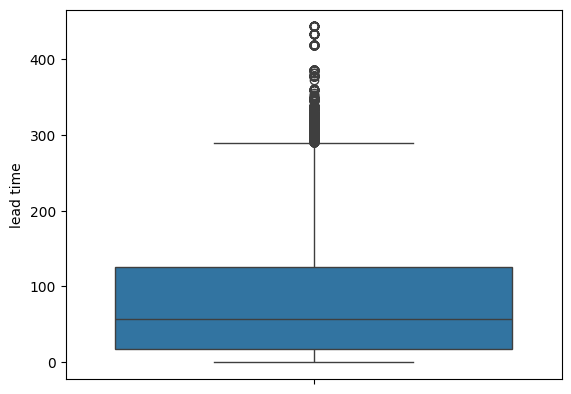

average price


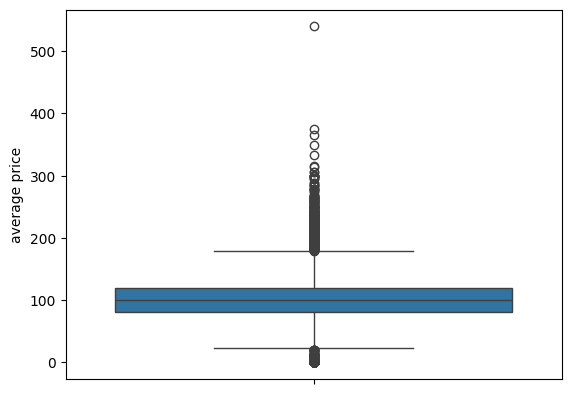

In [ ]:
# Show all outliers of the data
column=['lead time','average price']
for col in column:
  print(col)
  sns.boxplot(df[col])
  plt.show()

In [ ]:
# Handel the outliers
q1=np.percentile(df['lead time'],25)
q3=np.percentile(df['lead time'],75)
iqr=q3-q1
lower_bound=q1-(1.5*iqr)
upper_bound=q3+(1.5*iqr)
q1,q3,iqr,lower_bound,upper_bound
df=df[(df['lead time']>=lower_bound) & (df['lead time']<=upper_bound)]

In [ ]:
# Handel the outliers
q1=np.percentile(df['average price'],25)
q3=np.percentile(df['average price'],75)
iqr=q3-q1
lower_bound=q1-(1.5*iqr)
upper_bound=q3+(1.5*iqr)
q1,q3,iqr,lower_bound,upper_bound
df=df[(df['average price']>=lower_bound) & (df['average price']<=upper_bound)]

# **Preprocessing_2**

In [ ]:
# df['date of reservation']=pd.to_datetime(df['date of reservation'],infer_datetime_format=True,errors='coerce')

<ipython-input-26-3b304c8c4d70>:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['date of reservation']=pd.to_datetime(df['date of reservation'],infer_datetime_format=True,errors='coerce')


In [ ]:
df['date of reservation'].isnull().sum()

33

In [ ]:
# df['date of reservation']=df['date of reservation'].replace(np.nan,'2018-02-28')

In [ ]:
df['date of reservation']

,date of reservation
0,2015-10-02
1,2018-11-06
2,2018-02-28
3,2017-05-20
4,2018-04-11
...,...
36279,2018-04-11
36281,2017-10-15
36282,2018-12-26
36283,2018-07-06


In [ ]:
df['Booking_ID'] = pd.to_numeric(df['Booking_ID'], errors='coerce').astype('Int64')

In [ ]:
nan_indices = df['Booking_ID'].isna()
unique_numbers = range(1,1 + nan_indices.sum())
df.loc[nan_indices, 'Booking_ID'] = unique_numbers

In [ ]:
df.to_csv("Hotel_Booking_canceling.csv",index=False) #upload data to use in power BI

In [ ]:
df.drop(['date of reservation','Booking_ID'],axis=1,inplace=True)

# **Visualization_2**

In [ ]:
numerical_cols = df.select_dtypes(include='number').columns
categorical_cols = df.loc[:, ~df.columns.isin(numerical_cols)].columns

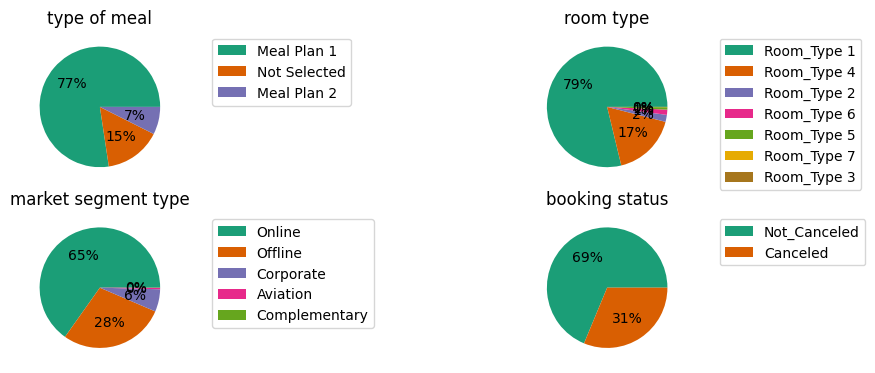

In [ ]:
plt.figure(figsize=(12,9))
for i,col in enumerate(categorical_cols):
    plt.subplot(4,2,i+1)
    x=df[col].value_counts().reset_index()
    plt.title(col)
    plt.pie(x=x['count'],autopct="%0.f%%",colors=sns.color_palette(palette='Dark2'))
    plt.legend(x[col],bbox_to_anchor=(1.2,1))


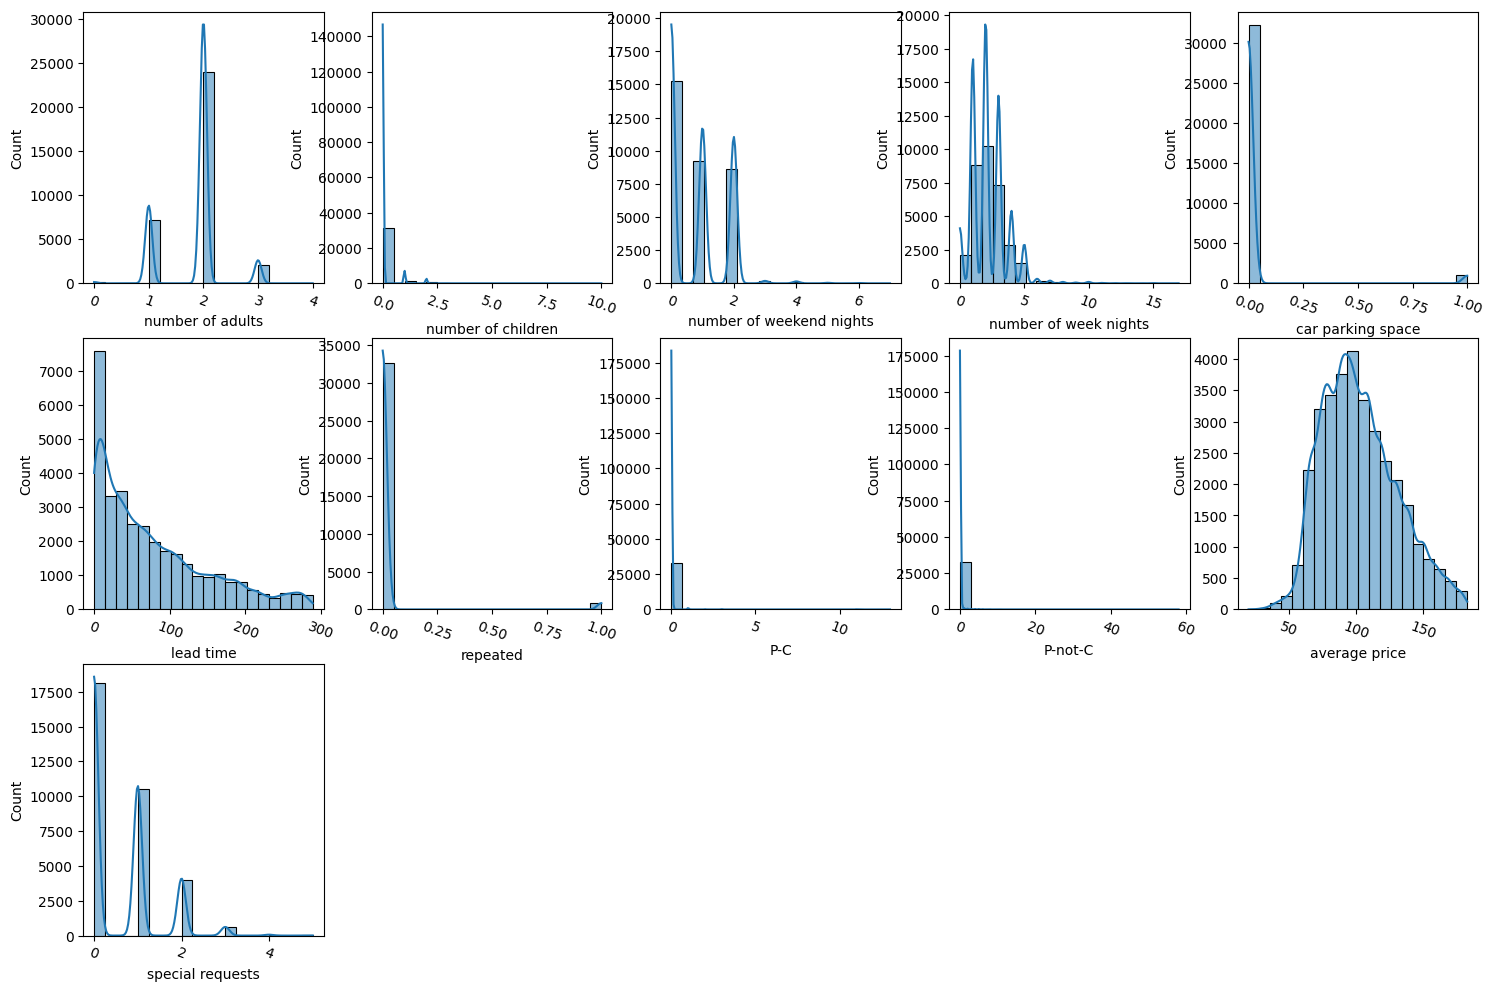

In [ ]:
plt.figure(figsize=(18,12))
for i,col in enumerate(numerical_cols):
    plt.subplot(3,5,i+1)
    sns.histplot(
            data=df,
            x=col,
            kde=True,
            bins=20
            )
    plt.xticks(rotation=-20)


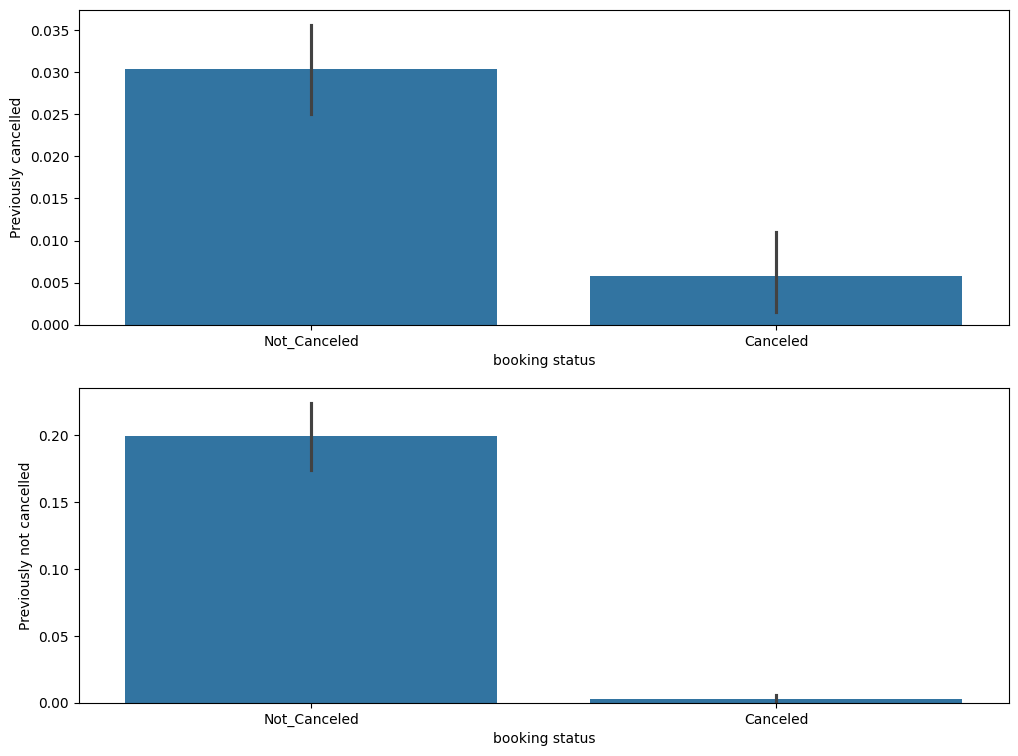

In [ ]:
plt.figure(figsize=(12,9))

plt.subplot(2,1,1)
sns.barplot(data=df,x="booking status",y="P-C")
plt.ylabel("Previously cancelled")

plt.subplot(2,1,2)
sns.barplot(data = df , x="booking status",y="P-not-C")
plt.ylabel("Previously not cancelled")

plt.show()


<Axes: xlabel='market segment type', ylabel='count'>

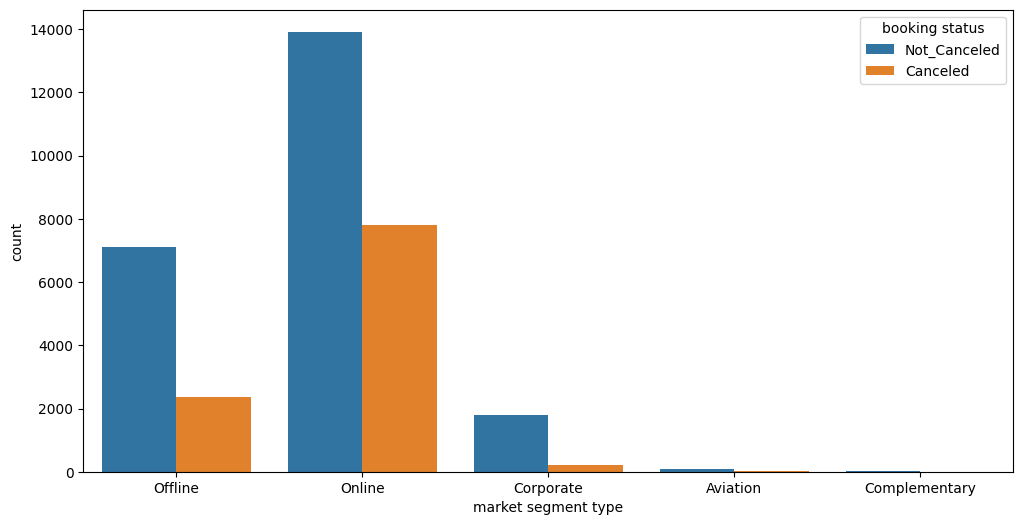

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df,x='market segment type',hue='booking status')

<Axes: xlabel='repeated', ylabel='count'>

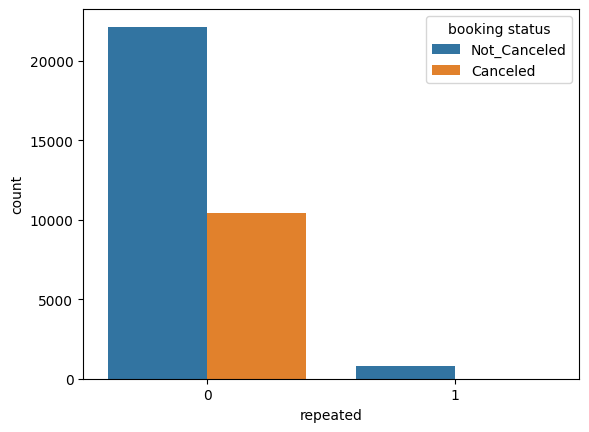

In [ ]:
sns.countplot(data=df,x='repeated',hue='booking status')


<Axes: xlabel='special requests', ylabel='count'>

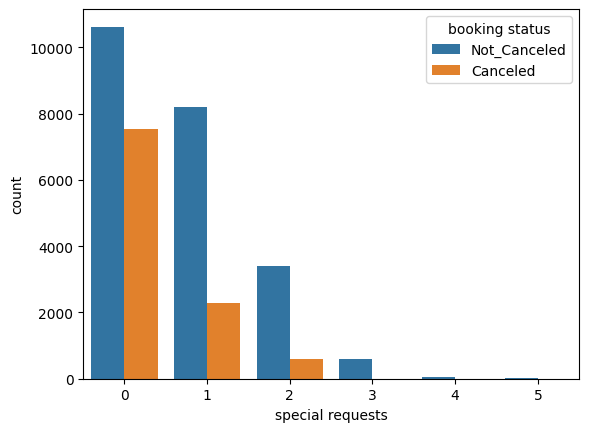

In [ ]:
sns.countplot(data=df,x='special requests',hue='booking status')


# **Preprocessing_3**

In [ ]:
df_copy=df.copy()

In [ ]:
label=LabelEncoder()
df['type of meal']=label.fit_transform(df['type of meal'].replace(-1,1))
df['room type']=label.fit_transform(df['room type'].replace(-1,1))
df['market segment type']=label.fit_transform(df['market segment type'].replace(-1,1))
df['booking status']=label.fit_transform(df['booking status'].replace(-1,1))

# **Visualization_3**

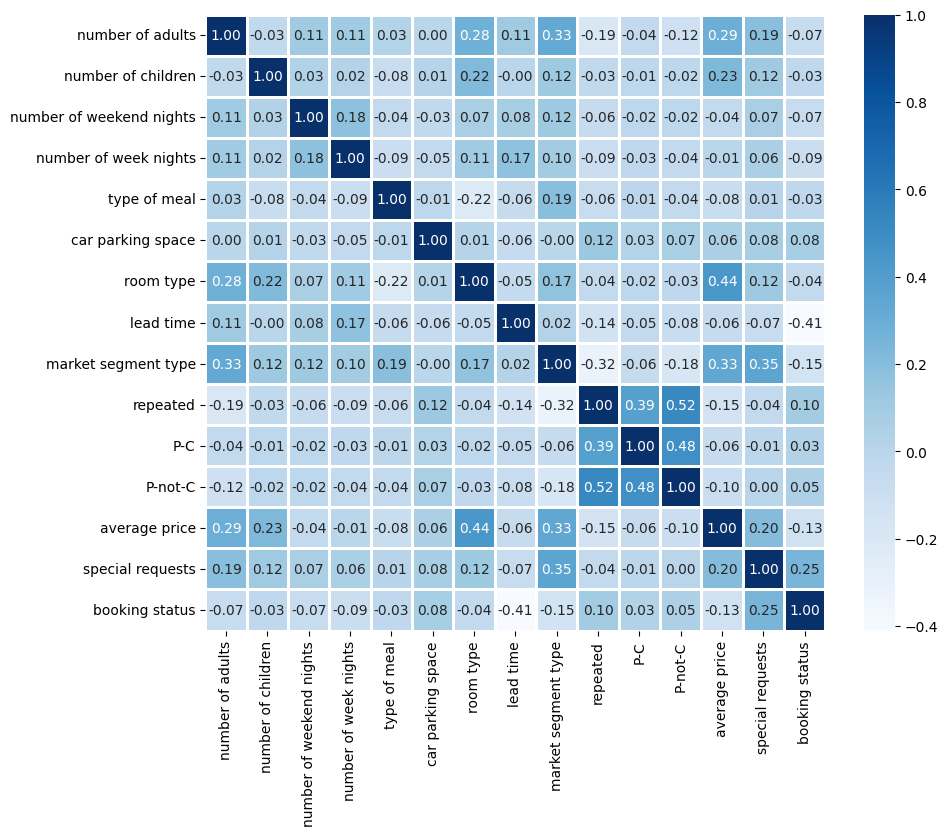

In [ ]:
# Correlation between features
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(),annot=True, fmt='.2f', linewidths=.8,cmap='Blues')
plt.show()

# **Preprocessing_3**

In [ ]:
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# **Training the model**

Split the data

In [ ]:
x = df.drop('booking status',axis=1)
y = df['booking status']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
# solve imbalamceed dataset
smote = SMOTE(random_state=42)
x_sampled, y_sampled = smote.fit_resample(x_train, y_train)
len(df[df['booking status']==0]),len(df[df['booking status']==1])

(10424, 22921)

Evalute the model by RandomForest algorithm

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [10, 50, 100],            # Number of trees in the forest
    'max_depth': [10, 20, 30],          # Maximum depth of the trees
}
rf = RandomForestClassifier(random_state=42)
rf.fit(x_sampled,y_sampled)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

grid_search.fit(x_sampled,y_sampled)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation Score:", best_score)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
test_accuracy = accuracy_score(y_test, y_pred)

print("Test Set Accuracy:", test_accuracy)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Parameters: {'max_depth': 30, 'n_estimators': 100}
Best Cross-Validation Score: 0.9038562807731365
Test Set Accuracy: 0.8794421952316689


In [ ]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(26676, 14) (6669, 14) (26676,) (6669,)


              precision    recall  f1-score   support

         0.0       0.81      0.80      0.81      2085
         1.0       0.91      0.91      0.91      4584

    accuracy                           0.88      6669
   macro avg       0.86      0.86      0.86      6669
weighted avg       0.88      0.88      0.88      6669



<Axes: >

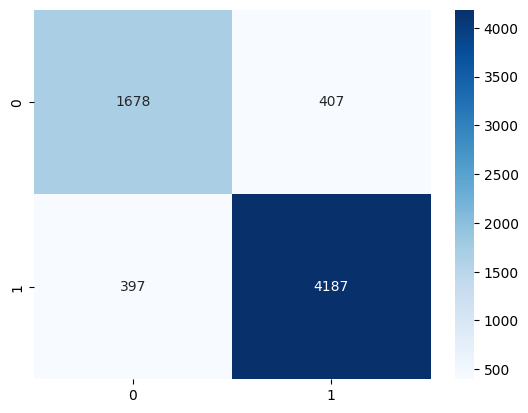

In [ ]:
print(classification_report(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d',cmap='Blues')